In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

Simple Convolution layer

(1, 3, 3, 1)


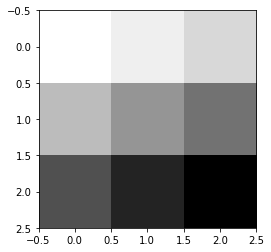

In [4]:
sess = tf.InteractiveSession()
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]],
                   [[7], [8], [9]]]], dtype = np.float32)
print(image.shape)
plt.imshow(image.reshape(3, 3), cmap='Greys')
plt.show()

- image : 1, 3, 3, 1
- Filter : 2, 2, 1, 1
- Stride : 1 X 1
- Padding: Valid
 

* image : 1개의 3 X 3 X 1의 이미지 (1,3,3,1) = (이미지갯수, 크기1,크기2, 색깔)
* Filter : 2 X 2 X 1 에 1개의 filter를 사용 (2,2,1,1) = (크기1, 크기2,, 색깔, 필터갯수)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[ 12.  16.]
 [ 24.  28.]]


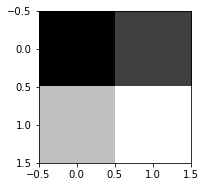

In [14]:
#print("imag \n", image)
print("image.shape", image.shape)
#Filter
weight = tf.constant([[[[1.0]], [[1.0]]],
                      [[[1.0]], [[1.0]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1, 1], padding = 'VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2, 2), cmap='gray')
    plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


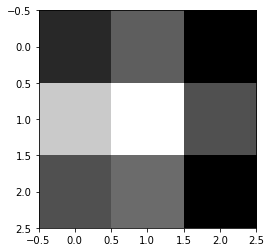

In [28]:
#print("imag \n", image)
print("image.shape", image.shape)
#Filter
weight = tf.constant([[[[1.0]], [[1.0]]],
                      [[[1.0]], [[1.0]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1, 1], padding = 'SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(3, 3), cmap='gray')
    plt.show()

### Filter 여러개

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]] 

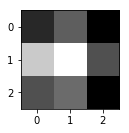

[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]] 

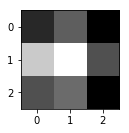

[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]] 

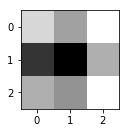

In [33]:
#print("imag \n", image)
print("image.shape", image.shape)
#Filter
weight = tf.constant([[[[1., 10., -1]], [[1., 10., -1]]],
                      [[[1., 10., -1]], [[1., 10., -1]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1, 1], padding = 'SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1, 3, i+1)
    plt.imshow(one_img.reshape(3, 3), cmap='gray')
    plt.show()

# MAX Pooling

- Filter 된 이미지를 적당한 크기로 (아래에서는 2X2크기) 안에 있는 값중 가장 큰값으로 변환한다.

In [36]:
image = np.array([[[[4], [3]],
                   [[2], [1]]]], dtype = np.float32)
pool = tf.nn.max_pool(image, ksize = [1, 2, 2, 1], strides = [1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


In [37]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


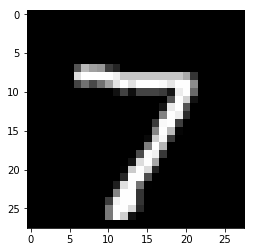

In [48]:

img = mnist.test.images[0].reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.show()

# MNIST Convolution layer

- Filter로 나오는 conv2d의 크기는 
- padding이 'valid'일떄는 (N- F)/strides + 1
- padding이 'SAME'일때는 N/stride

Tensor("Conv2D_37:0", shape=(1, 14, 14, 5), dtype=float32)
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -3.27160209e-03  -1.44063309e-02
   -2.39909235e-02  -2.04765573e-02  -1.48549760e-02  -1.48549760e-02
   -1.48549760e-02  -1.41942780e-02  -5.62034640e-03   0.000

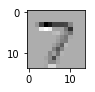

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   3.24364472e-03  -8.27165227e-03
   -8.96283239e-03  -1.91414282e-02  -1.93090700e-02  -1.93090700e-02
   -1.93090700e-02  -1.93185750e-02  -6.30607270e-03   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.000000

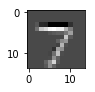

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   2.90744286e-03   1.20555628e-02
    6.15314348e-03  -1.61344721e-03  -1.92098296e-03  -1.92098296e-03
   -1.92098296e-03  -2.20902963e-03  -3.13874125e-03   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.000000

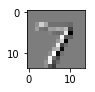

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   7.47001730e-03   2.23704018e-02
    2.28126906e-02   1.50443725e-02   1.10467225e-02   1.10467225e-02
    1.10467225e-02   1.03842542e-02   1.79899205e-03   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.000000

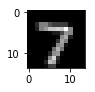

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   8.52913596e-03   2.48067249e-02
    1.71969198e-02   1.35600017e-02   1.21149300e-02   1.21149300e-02
    1.21149300e-02   1.17503731e-02   6.75062416e-03   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.000000

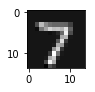

In [64]:
sess = tf.InteractiveSession()
img = mnist.test.images[0]
# 28 X 28의 1색깔 -1은 알아서 계산하라는 뜻
img = img.reshape(-1, 28, 28, 1)
# 3*3의 filter 5개 이용
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev = 0.01))

conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)

sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1)
    plt.imshow(one_img.reshape(14, 14), cmap='gray')
    plt.show()

# MNIST Max pooling

- conv2d 의 크기 14 * 14 
- ksize 2*2 
- strides 2
- 14/2 = 7  ---> 7*7 크기의 아웃풋

Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)


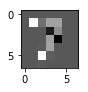

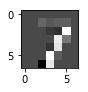

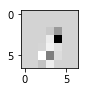

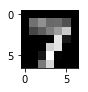

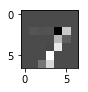

In [62]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)

for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1)
    plt.imshow(one_img.reshape(7, 7), cmap='gray')
    plt.show()

# MNIST

In [78]:

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

#L1 image shape = (?, 28, 28, 1)
# filter 3*3 크리 1color 32개로 진행
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
# conv -> (?, 28, 28, 32)
# pool -> (?, 14, 14, 32)
L1_conv2d = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding = 'SAME')
L1 = tf.nn.relu(L1_conv2d)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')

# L2 image shape = (?, 14, 14, 32)
W2= tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.01))
# conv -> (?, 14, 14, 64)
# pool -> (?, 7, 7, 64)

L2_conv2d = tf.nn.conv2d(L1, W2, strides = [1, 1, 1, 1], padding = 'SAME')
L2 = tf.nn.relu(L2_conv2d)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
# 이것을 Fully connected  layer에 넣기 위해서 reshpae를 통해 펼친다
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])
# 그리고 L2를 (?, 3136)으로 reshape

# final FC 7*7*64 inputs -> 10 output
W3 = tf.get_variable('W33', shape = [7 * 7 * 64, 10], initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)

predicted = tf.argmax(logits, 1)
is_correct = tf.equal(predicted, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, dtype = tf.float32))

training_epochs = 15
batch_size = 100

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("Learning Started, It takes times")
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print('epoch : {}, cost ={:.9f}'.format(epoch + 1, avg_cost))
    
print("Learning Finished")

print("Accuracy : ", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    

Learning Started, It takes times
epoch : 1, cost =0.317737669
epoch : 2, cost =0.093426538
epoch : 3, cost =0.069733644
epoch : 4, cost =0.057485973
epoch : 5, cost =0.049331320
epoch : 6, cost =0.039995232
epoch : 7, cost =0.037069012
epoch : 8, cost =0.033070875
epoch : 9, cost =0.027026506
epoch : 10, cost =0.026548463
epoch : 11, cost =0.022563580
epoch : 12, cost =0.018860610
epoch : 13, cost =0.018250535
epoch : 14, cost =0.014765972
epoch : 15, cost =0.015035490
Learning Finished
Accuracy :  0.9885


# DEEP CONV in MNIST

In [87]:
X = tf.placeholder(tf.float32, shape = [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, shape = [None, 10])
#dropout
keep_prob = tf.placeholder(tf.float32)
#변수
learning_rate = 0.001

#첫번째 레이어 입력 그림 크기 [-1, 28, 28, 1]
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev = 0.35))

L1 = tf.nn.conv2d(X_img, W1, strides = [1, 1, 1, 1], padding = 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
L1 = tf.nn.dropout(L1, keep_prob)

#두번째 레어이 입력 그림 크기 [-1, 14, 14, 32]
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.35))

L2 = tf.nn.conv2d(L1, W2, strides = [1, 1, 1, 1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize =[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
L2 = tf.nn.dropout(L2, keep_prob)

#세번째 레이어 입력 그림 크기 [-1, 7, 7, 64]
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev = 0.35))

L3 = tf.nn.conv2d(L2, W3, strides = [1, 1, 1, 1], padding = 'SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
L3 = tf.nn.dropout(L3, keep_prob)

#펼치기
L3 = tf.reshape(L3, [-1, 4 * 4 * 128])

#네번째 레이어 여기서부터는 fully connected layer
W4 = tf.get_variable('W444444444', shape = [4 * 4 * 128, 512], initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob)

#다섯번째 레이어 (output layer)
W5 = tf.get_variable('W55555555', shape = [512, 10], initializer = tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y))
optimizer = tf.train.AdagradOptimizer(learning_rate = learning_rate).minimize(cost)

is_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 15
batch_size = 100
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob : 0.7}
        c, _= sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print('epoch : {}, cost ={:.9f}'.format(epoch + 1, avg_cost))
    
print("Learning Finished")

print("Accuracy : ", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

epoch : 1, cost =5.335884322
epoch : 2, cost =2.050126908
epoch : 3, cost =1.861190759
epoch : 4, cost =1.733842135


KeyboardInterrupt: 